In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

from CommonUtilsBacktest import BacktestInterfaceL1, BacktestInterfaceL2_snapshot, OrderDirection
from pathlib import Path
import pandas as pd

# trades = pd.read_csv('../data/trades.csv')
# quotes = pd.read_csv('../data/quotes.csv')

source_dir = '../data/1000beerusdt_20240601/'


In [21]:
class TestModel(BacktestInterfaceL1):
    def __init__(self, source_dir, pair=('USDT', 'BEER'), starting_pair=(1000, 0)):
        super().__init__(source_dir, pair, starting_pair) 
    
    def backtest(self):
        self.filled_orders = []
        self.logger.info("Starting backtest...")
        # Iterate over quotes
        for index, row in self.quotes_sample.iterrows():
            timestamp = pd.to_datetime(row['timestamp'])
            bid_price = row['bid_price']
            ask_price = row['ask_price']
            
            # Simple strategy: Buy if ask_price < threshold, sell if bid_price > threshold
            buy_threshold = 0.182
            sell_threshold = 0.184
            
            if ask_price < buy_threshold:
                self.place_order(
                    direction=OrderDirection.BUY,
                    price=ask_price,
                    amount = 1,
                    timestamp=timestamp
                )
            
            if bid_price > sell_threshold:
                self.place_order(
                    direction=OrderDirection.SELL,
                    price=bid_price,
                    amount = 1,
                    timestamp=timestamp
                )
            
            self.fill_orders(bid_price, ask_price)
        self.logger.info("Backtest finished.")
        self.logger.info(f"Final balances: {self.pair1.name}: {self.pair1.amount}, {self.pair2.name}: {self.pair2.amount}")
        self.logger.info(f"Number of filled orders: {len(self.filled_orders)}")


    def plot(self):
        self.logger.info("Plotting quotes and trades")
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.lineplot(
            x="timestamp",
            y="ask_price",
            data=self.quotes_sample,
            ax=ax,
            label="Ask Price",
        )
        sns.lineplot(
            x="timestamp",
            y="bid_price",
            data=self.quotes_sample,
            ax=ax,
            label="Bid Price",
        )
        sns.scatterplot(
            x="timestamp",
            y="price",
            data=self.trades_sample,
            ax=ax,
            hue="side",
            palette={"sell": "red", "buy": "green"}

        )

        df = pd.DataFrame(self.filled_orders)
        sns.scatterplot(
            x = 'timestamp',
            y = 'price',
            data = df,
            hue = 'direction',
            ax = ax,
        )
        plt.show()
    
    def plot_filled_orders(self):
        df = pd.DataFrame(self.filled_orders)
        fig, ax = plt.subplots(figsize=(12,6))
        sns.scatterplot(
            x = 'timestamp',
            y = 'price',
            data = df,
            hue = 'direction',
            ax = ax,
        )
        plt.show()
        
        
        
test = TestModel(source_dir)
test.sample_quotes(end_time='2024-06-01 05:01:10.5')
test.sample_trades(end_time='2024-06-01 05:01:10.5')


===Cleaning DF===
Original shape: (228638, 8)
After dropping NaNs: (228638, 8)
===Cleaning DF===
Original shape: (318330, 8)
After dropping NaNs: (318330, 8)


2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:41,095 - TestModel - INFO - Starting backtest...
2024-11-21 01:27:43,065 - TestModel - INFO - Backtest finished.
2024-11-21 01:27:43,065 - TestModel - INFO - Backtest finished.
2024-11-21 01:27:43,065 - TestModel - INFO - Backtest finished.
2024-11-21 01:27:43,065 - TestModel - INFO - Backtest finished.
2024-11-21 01:27:43,065 - TestModel - INFO - Backtest finished.
2024-11-21 01:27:43,

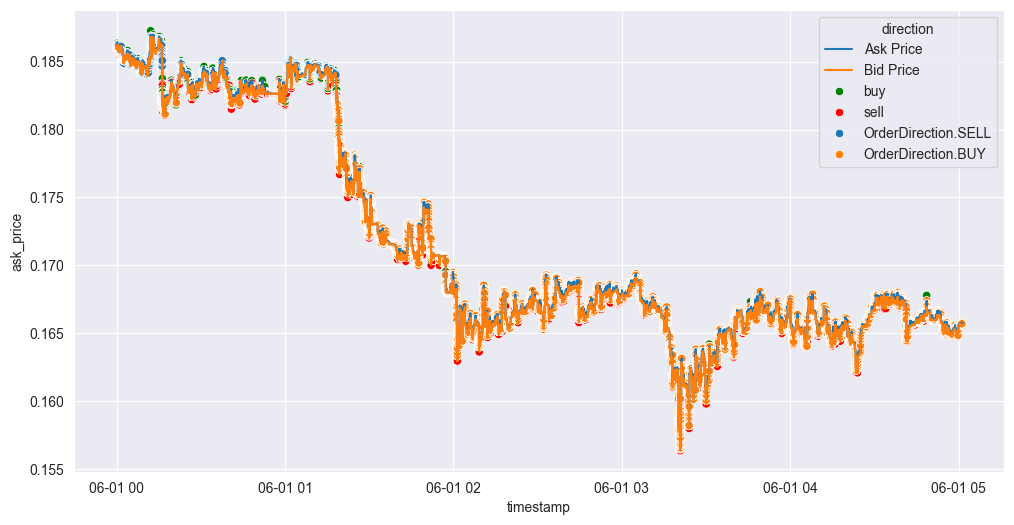

In [22]:
test.backtest()
test.plot()

In [2]:
class BaselineModel(BacktestInterfaceL1):
    def __init__(self, source_dir, pair=('USDT', 'BEER'), starting_pair=(1000, 0)):
        super().__init__(source_dir, pair, starting_pair) 
    
    def backtest(self):
        pass

class BaselineModelL2(BacktestInterfaceL2_snapshot):
    def __init__(self, source_dir, pair=('USDT', 'BEER'), starting_pair=(1000, 0)):
        super().__init__(source_dir, pair, starting_pair) 
    
    def backtest(self):
        pass
    
baseline = BaselineModel(source_dir)

===Cleaning DF===
Original shape: (228638, 8)
After dropping NaNs: (228638, 8)
===Cleaning DF===
Original shape: (318330, 8)
After dropping NaNs: (318330, 8)


In [8]:
baseline.sample_quotes(
    end_time='2024-06-01 01:01:10.5'
)
baseline.sample_trades(
    end_time='2024-06-01 01:01:10.5'
)
baseline.trades_sample

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount
0,bybit,1000BEERUSDT,2024-06-01 00:00:00.731,2024-06-01 00:00:00.770069,dfc57692-1b1b-5816-bda5-742c338b0db5,buy,0.18625,4
1,bybit,1000BEERUSDT,2024-06-01 00:00:00.731,2024-06-01 00:00:00.770069,0078d498-8b6d-5b34-999f-e7e716237200,buy,0.18625,4
2,bybit,1000BEERUSDT,2024-06-01 00:00:00.731,2024-06-01 00:00:00.770069,6c26f242-1e55-5780-87a6-188eaa47b503,buy,0.18625,4
3,bybit,1000BEERUSDT,2024-06-01 00:00:00.731,2024-06-01 00:00:00.770069,3033de7a-dd6a-521d-8602-5c770465115d,buy,0.18625,4
4,bybit,1000BEERUSDT,2024-06-01 00:00:00.731,2024-06-01 00:00:00.770069,8189e466-9042-5f90-b349-4933f005f26e,buy,0.18625,4
...,...,...,...,...,...,...,...,...
12014,bybit,1000BEERUSDT,2024-06-01 01:01:06.464,2024-06-01 01:01:06.502786,58a826b5-90b8-5e91-beda-df41ff215665,sell,0.18456,95
12015,bybit,1000BEERUSDT,2024-06-01 01:01:07.456,2024-06-01 01:01:07.494770,f78c941d-e325-5cfa-a3c2-e54bd7cd226a,sell,0.18453,216
12016,bybit,1000BEERUSDT,2024-06-01 01:01:07.456,2024-06-01 01:01:07.494770,9b2fead5-04c1-5bcc-9278-8f2e8ee5f7c7,sell,0.18451,213
12017,bybit,1000BEERUSDT,2024-06-01 01:01:07.456,2024-06-01 01:01:07.494770,bfbe531a-0a9d-5562-9ae0-3aa27d23dc78,sell,0.18450,3


2024-11-21 00:56:39,749 - BaselineModel - INFO - Plotting quotes and trades


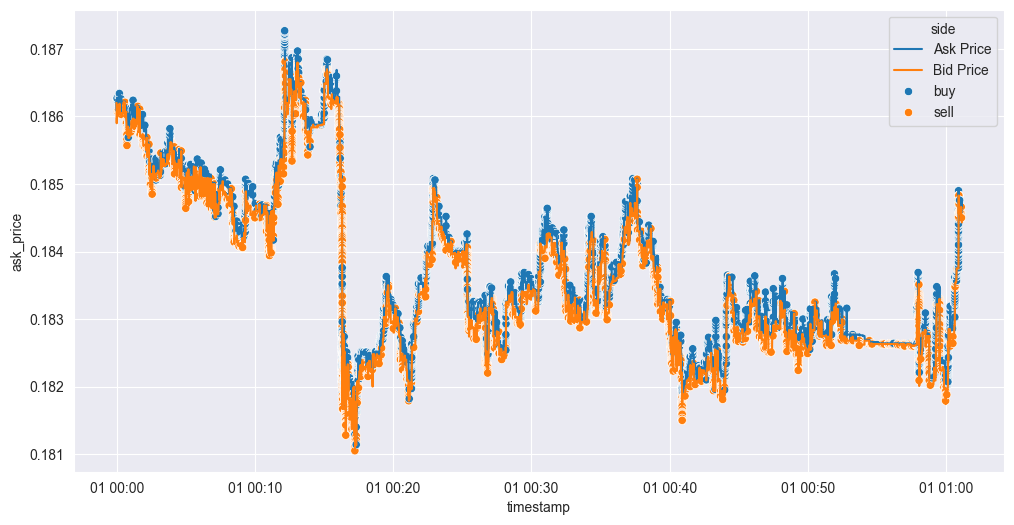

In [9]:
baseline.plot()